## Logestic model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv('C:/Users/signi/Downloads/Decision Model/iris.csv')

In [43]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [47]:
data['species_label'], _ = pd.factorize(data['species'])
data['species'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [49]:
data.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'species',
       'species_label'],
      dtype='object')

In [115]:
features = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
response = ['species_label']
X=data[features].values
y=data[response].values

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [117]:
X_train.shape

(112, 4)

In [118]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=50)

In [120]:
model.fit(X_train,y_train)

C:\Users\signi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\signi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=50)

In [121]:
y_pred=model.predict(X_test)

In [122]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2], dtype=int64)

In [123]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

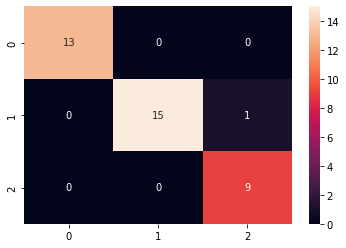

In [124]:
import seaborn as sn
conf_mat = confusion_matrix(y_test,y_pred)
sn.heatmap(conf_mat, annot=True)
plt.show()

In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



## Decision Tree model

In [138]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,species,species_label
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0


In [140]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt 
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display

In [143]:
# train the decision tree
dtree = tree.DecisionTreeClassifier( max_depth=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [144]:
y_pred = dtree.predict(X_test)

In [145]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.89


In [154]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  3  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.83      0.94      0.88        16
           2       0.86      0.67      0.75         9

    accuracy                           0.89        38
   macro avg       0.90      0.87      0.88        38
weighted avg       0.90      0.89      0.89        38



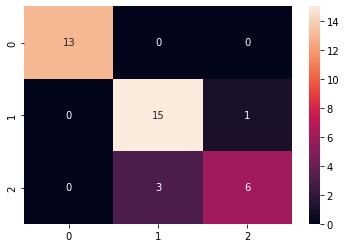

In [155]:
import seaborn as sn
conf_mat = confusion_matrix(y_test,y_pred)
sn.heatmap(conf_mat, annot=True)
plt.show()

[Text(0.4, 0.8333333333333334, 'X[2] <= 2.35\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.6, 0.5, 'X[2] <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.05\nsamples = 39\nvalue = [0, 1, 38]')]

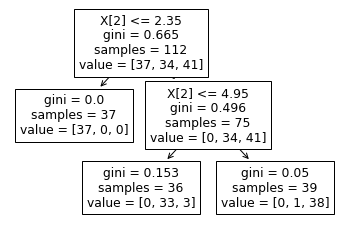

In [147]:
tree.plot_tree(dtree)

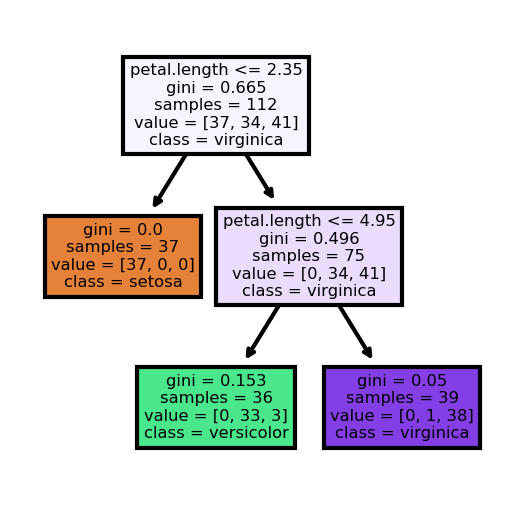

In [153]:
fn = ['sepal.length','sepal.width','petal.length','petal.width']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(dtree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
# fig.savefig('imagename.png')

## On comparing, Logestic Regression has the best accuracy on the Iris Dataset then decision tree